In [7]:
# 数据读取及基本处理
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

In [8]:
#读取数据
df1=pd.read_csv("C:\\Users\\lenovo\\AD_cleaned.csv")

df2=pd.read_csv("C:\\Users\\lenovo\\normal_cleaned.csv")

df1.head()


,样本号,年龄,ALT,AST,ALP,GGT,TBIL,DBIL,IBIL,TP,...,Mg,K,Na,Cl,CK,CK-MB,MYO,阿尔兹海默病,性别_女,性别_男
0,803,70.000000,22.0,21.0,67.0,16.0,8.2,3.0,5.2,69.8,...,0.75,3.6,143.0,103.0,67.0,14.0,69.4,1,1,0
1,850,70.083333,10.0,14.0,58.0,15.0,16.5,5.7,10.8,69.5,...,0.97,3.7,143.0,107.0,67.0,8.0,45.9,1,1,0
2,855,79.750000,7.0,12.0,85.0,15.0,22.0,6.7,15.3,67.4,...,1.03,5.0,147.0,110.0,41.0,18.0,61.1,1,1,0
3,858,84.666667,15.0,19.0,79.0,21.0,14.5,5.6,8.9,68.9,...,1.01,4.2,144.0,107.0,20.0,16.0,62.2,1,1,0
4,860,75.166667,15.0,28.0,66.0,10.0,16.8,5.2,11.6,67.2,...,0.91,3.8,146.0,107.0,36.0,15.0,46.7,1,1,0


In [9]:
df2.head()

,样本号,年龄,ALT,AST,GGT,TBIL,DBIL,IBIL,TP,ALB,...,GLU,TC,TG,HDL-C,LDL-C,ALP,HbA1C,正常,性别_女,性别_男
0,500,31.750000,10.0,10.0,10.0,10.0,1.0,9.0,70.0,50.0,...,5.00,5.00,5.00,1.00,1.0,NaN,NaN,1,0,1
1,854,60.500000,21.0,23.0,23.0,9.3,2.0,7.3,80.6,44.7,...,5.22,4.87,3.22,0.90,2.8,NaN,NaN,1,0,1
2,857,61.000000,14.0,18.0,17.0,7.0,1.8,5.2,78.8,46.0,...,5.76,5.49,2.38,0.95,3.9,NaN,NaN,1,1,0
3,754,66.083333,25.0,20.0,32.0,6.3,1.4,4.9,68.5,41.4,...,5.90,4.90,5.09,0.64,2.2,NaN,NaN,1,1,0
4,755,68.583333,15.0,27.0,65.0,13.0,4.0,9.0,70.4,45.2,...,6.37,4.09,2.34,1.14,2.1,NaN,NaN,1,0,1


In [10]:
print(df1.columns)
print(df2.columns)

Index(['样本号', '年龄', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP',
       'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU',
       'TC', 'TG', 'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'CK',
       'CK-MB', 'MYO', '阿尔兹海默病', '性别_女', '性别_男'],
      dtype='object')
Index(['样本号', '年龄', 'ALT', 'AST', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB',
       'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'GLU', 'TC', 'TG',
       'HDL-C', 'LDL-C', 'ALP', 'HbA1C', '正常', '性别_女', '性别_男'],
      dtype='object')


患病和正常样本共同有的特征有:
'样本号', '年龄', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP',
       'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU',
       'TC', 'TG', 'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'CK',
       'CK-MB', 'MYO', '阿尔兹海默病', '性别_女', '性别_男'
       
'样本号'，年龄', 'ALT', 'AST', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB',
       'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'GLU', 'TC', 'TG',
       'HDL-C', 'LDL-C', 'ALP', 'HbA1C', '正常', '性别_女', '性别_男'

In [11]:
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined.fillna(0, inplace=True)  # 用0填充缺失值，或者使用其他适当的默认值

In [12]:
df_combined.to_csv('combined_dataset.csv', index=False)

In [13]:
print(df_combined.columns)

Index(['样本号', '年龄', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP',
       'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU',
       'TC', 'TG', 'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'CK',
       'CK-MB', 'MYO', '阿尔兹海默病', '性别_女', '性别_男', 'HbA1C', '正常'],
      dtype='object')


In [23]:
df_combined.shape

(2804, 37)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X = df_combined[[
    '年龄', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP',
    'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU',
    'TC', 'TG', 'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'CK',
    'CK-MB', 'MYO', '性别_女', '性别_男']]

# 目标变量 y 是 df 中的一个列
y = df_combined['阿尔兹海默病']

# 划分训练集和测试集，确保 stratify 参数是 y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 打印前几行数据以检查
print(df_combined.head())

   样本号         年龄   ALT   AST   ALP   GGT  TBIL  DBIL  IBIL    TP  ...     Na  \
0  803  70.000000  22.0  21.0  67.0  16.0   8.2   3.0   5.2  69.8  ...  143.0   
1  850  70.083333  10.0  14.0  58.0  15.0  16.5   5.7  10.8  69.5  ...  143.0   
2  855  79.750000   7.0  12.0  85.0  15.0  22.0   6.7  15.3  67.4  ...  147.0   
3  858  84.666667  15.0  19.0  79.0  21.0  14.5   5.6   8.9  68.9  ...  144.0   
4  860  75.166667  15.0  28.0  66.0  10.0  16.8   5.2  11.6  67.2  ...  146.0   

      Cl    CK  CK-MB   MYO  阿尔兹海默病  性别_女  性别_男  HbA1C   正常  
0  103.0  67.0   14.0  69.4     1.0     1     0    0.0  0.0  
1  107.0  67.0    8.0  45.9     1.0     1     0    0.0  0.0  
2  110.0  41.0   18.0  61.1     1.0     1     0    0.0  0.0  
3  107.0  20.0   16.0  62.2     1.0     1     0    0.0  0.0  
4  107.0  36.0   15.0  46.7     1.0     1     0    0.0  0.0  

[5 rows x 37 columns]


In [17]:
# 标准化特征
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 创建逻辑回归模型
lr = LogisticRegression(C=1.0, random_state=0)  # 通常C的值小于1
lr.fit(X_train_std, y_train)

# 预测测试集
y_pred2 = lr.predict(X_test_std)

# 打印准确率
print('准确率: %.2f' % accuracy_score(y_test, y_pred2))

准确率: 1.00


In [18]:



#模型构建

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# XGBoost模型参数
params_xgb = {    'learning_rate': 0.02,            # 学习率，控制每一步的步长，用于防止过拟合。典型值范围：0.01 - 0.1    
              'booster': 'gbtree',              # 提升方法，这里使用梯度提升树（Gradient Boosting Tree）   
              'objective': 'binary:logistic',   # 损失函数，这里使用逻辑回归，用于二分类任务  
              'max_leaves': 127,                # 每棵树的叶子节点数量，控制模型复杂度。较大值可以提高模型复杂度但可能导致过拟合   
              'verbosity': 1,                   # 控制 XGBoost 输出信息的详细程度，0表示无输出，1表示输出进度信息    
              'seed': 42,                       # 随机种子，用于重现模型的结果   
              'nthread': -1,                    # 并行运算的线程数量，-1表示使用所有可用的CPU核心   
              'colsample_bytree': 0.6,          # 每棵树随机选择的特征比例，用于增加模型的泛化能力   
              'subsample': 0.7,                 # 每次迭代时随机选择的样本比例，用于增加模型的泛化能力    
              'eval_metric': 'logloss'          # 评价指标，这里使用对数损失（logloss）
             }
# 初始化XGBoost分类模型
model_xgb = xgb.XGBClassifier(**params_xgb)

In [19]:
# 定义参数网格，用于网格搜索
param_grid = {    'n_estimators': [100, 200, 300, 400, 500],  # 树的数量    
              'max_depth': [3, 4, 5, 6, 7],               # 树的深度    
              'learning_rate': [0.01, 0.02, 0.05, 0.1],   # 学习率
             }


# 使用GridSearchCV进行网格搜索和k折交叉验证
grid_search = GridSearchCV(    estimator=model_xgb,   
                           param_grid=param_grid,    
                           scoring='neg_log_loss',  # 评价指标为负对数损失   
                           cv=5,                    # 5折交叉验证   
                           n_jobs=-1,               # 并行计算    
                           verbose=1                # 输出详细进度信息
                          )



# 训练模型
grid_search.fit(X_train, y_train)



# 输出最优参数
print("Best parameters found: ", grid_search.best_params_)
print("Best Log Loss score: ", -grid_search.best_score_)

# 使用最优参数训练模型
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Log Loss score:  0.0017896006919702317


In [20]:
#模型评价
from sklearn.metrics import classification_report# 预测测试集
y_pred = best_model.predict(X_test)# 输出模型报告， 查看评价指标
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       155
         1.0       1.00      1.00      1.00       406

    accuracy                           1.00       561
   macro avg       1.00      1.00      1.00       561
weighted avg       1.00      1.00      1.00       561



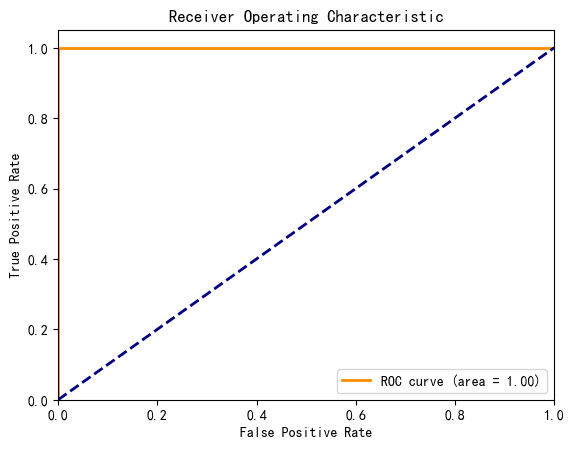

In [22]:
#ROC曲线
from sklearn.metrics import roc_curve, auc# 预测概率
y_score = best_model.predict_proba(X_test)[:, 1]# 计算ROC曲线
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_score)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()